In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
%matplotlib notebook

In [3]:
# Import data
df_train = pd.read_csv('train.csv')

# Fill in NaNs
df_train.fillna({'Age': df_train['Age'].mean(), 'Cabin':'NA'}, inplace=True)

In [4]:
# Create feature and target arrays
y = df_train['Survived']
X = df_train.drop(columns=['Survived'])

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [5]:
#
#  Exploratory analysis on full training dataset
#

In [6]:
print df_train['Survived'].dtype
survived = df_train['Survived'].values

int64


<IPython.core.display.Javascript object>


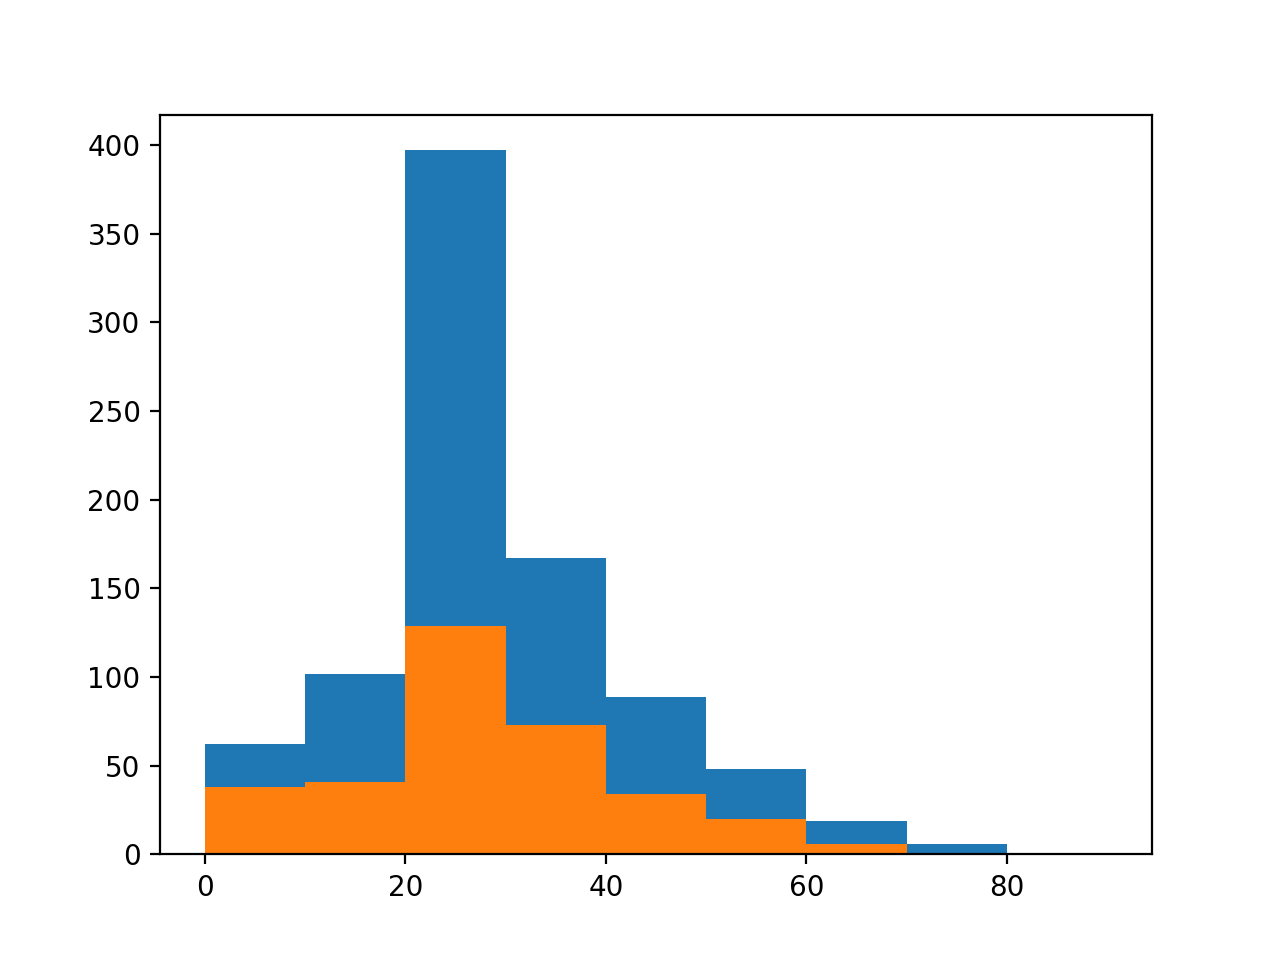

In [7]:
plt.figure()
age = df_train['Age'].values
plt.hist(age[~np.isnan(age)], bins=np.arange(0,100,10))
plt.hist(age[~np.isnan(age) & df_train['Survived'].values==1], bins=np.arange(0,100,10))
plt.show()

<IPython.core.display.Javascript object>


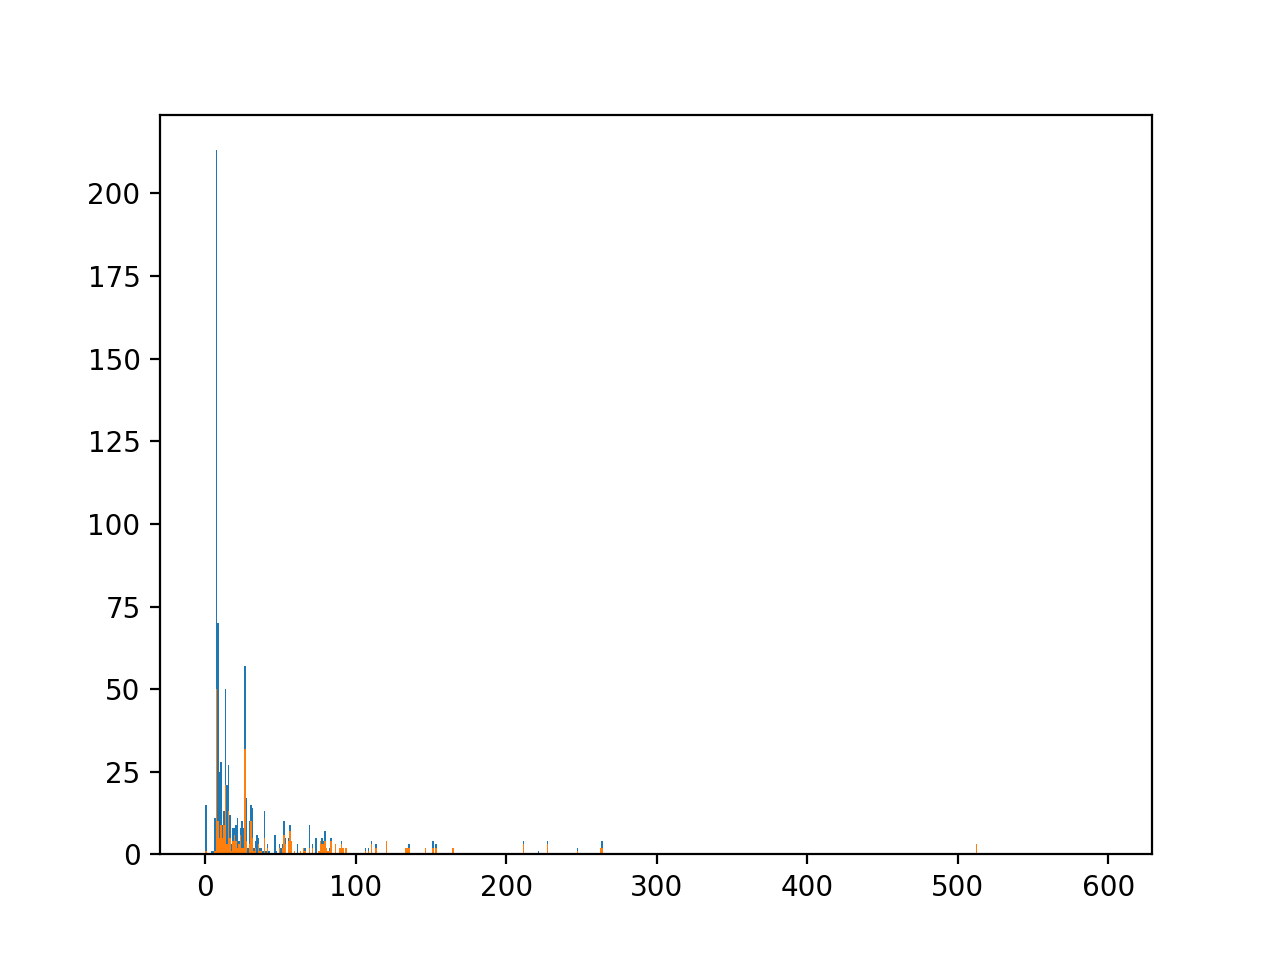

In [8]:
plt.figure()
fare = df_train['Fare'].values
plt.hist(fare, bins=np.arange(0,600,1))
plt.hist(fare[survived==1], bins=np.arange(0,600,1))
plt.show()

<IPython.core.display.Javascript object>


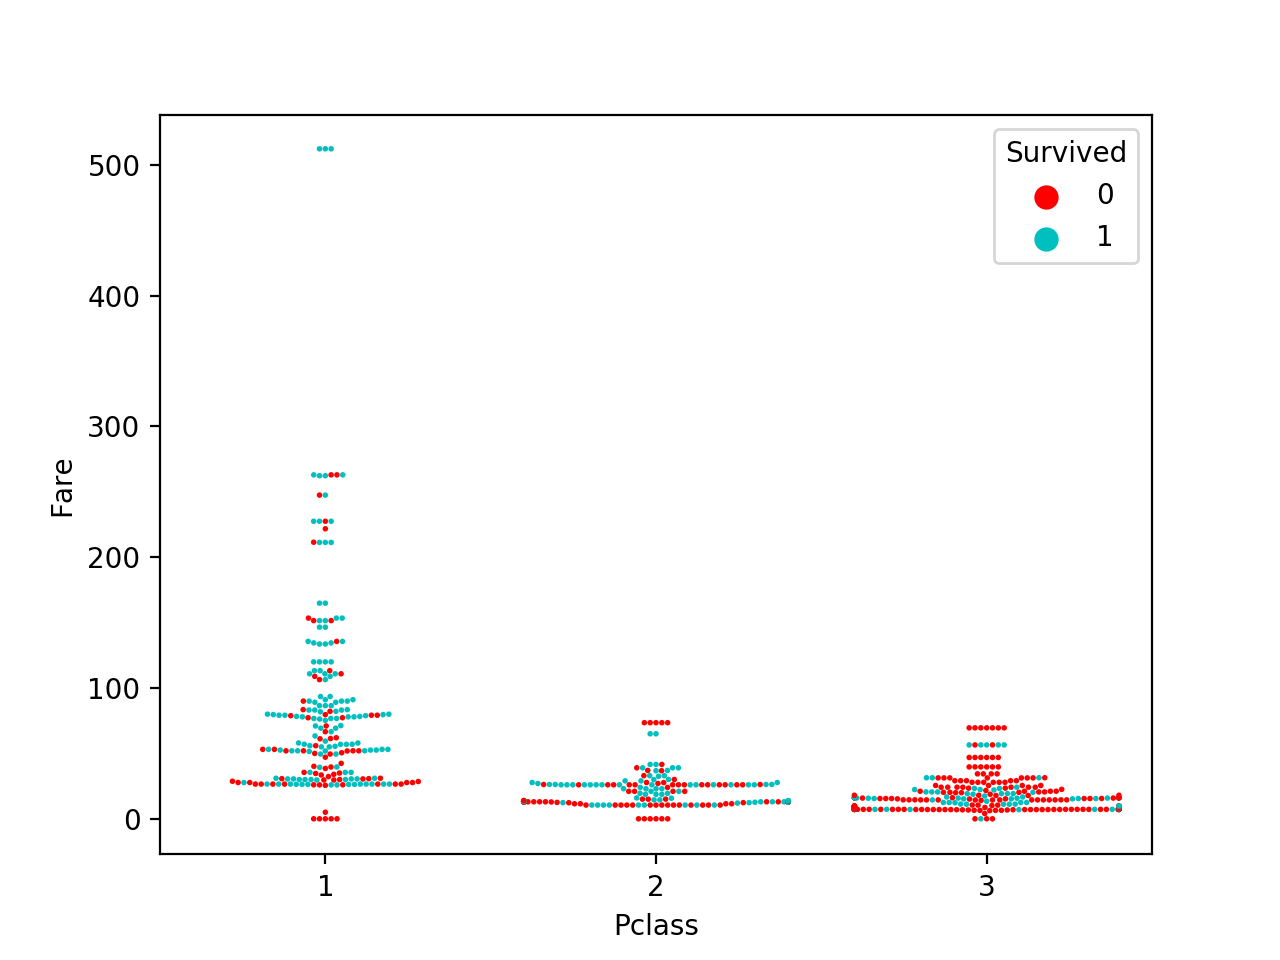

In [9]:
plt.figure()
sns.swarmplot(x="Pclass", y="Fare", hue="Survived",
              palette=["r", "c"], data=df_train, size=2)
plt.show()

<IPython.core.display.Javascript object>


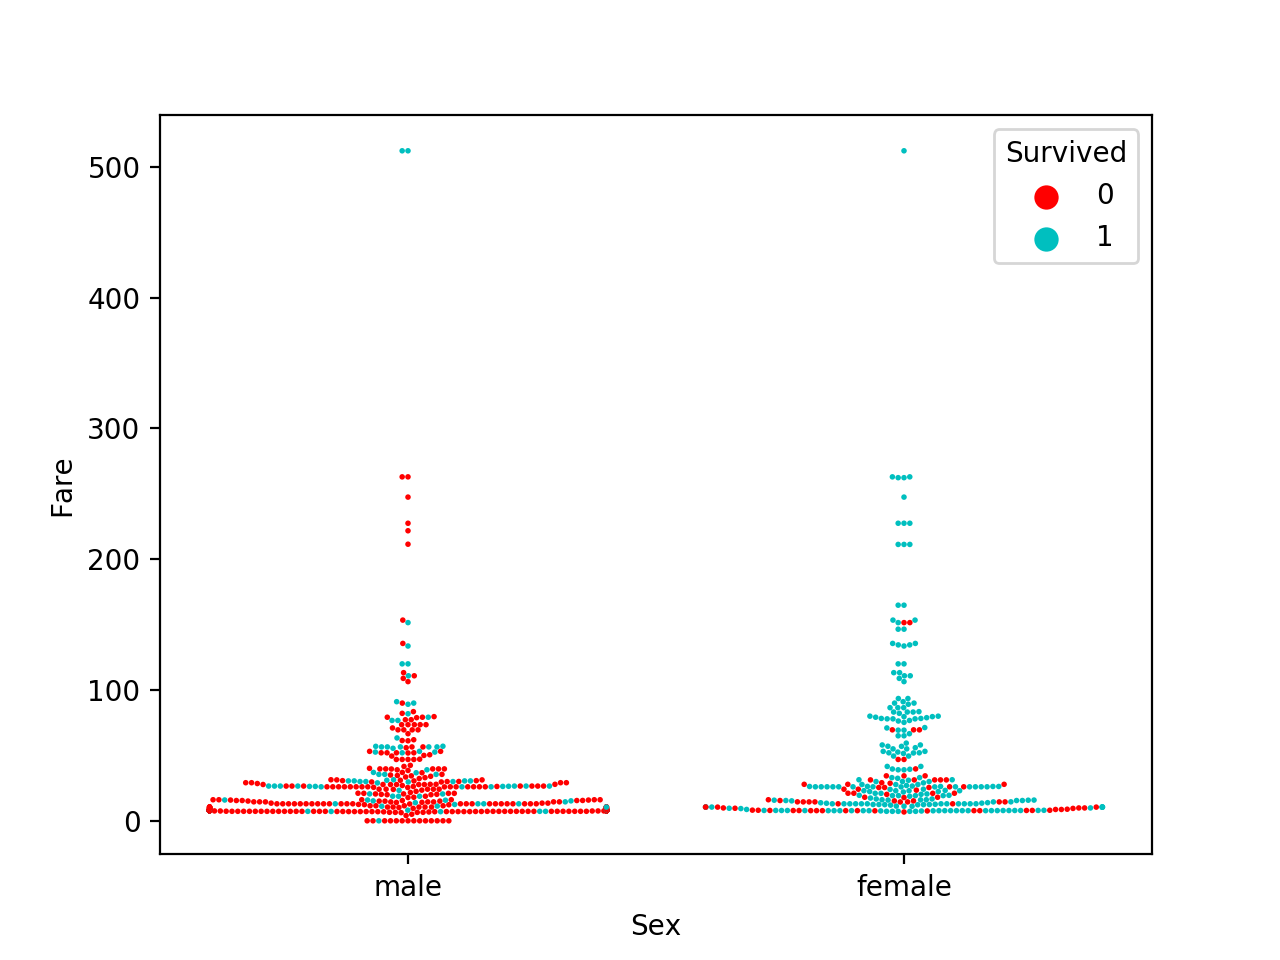

In [10]:
plt.figure()
sns.swarmplot(x="Sex", y="Fare", hue="Survived",
              palette=["r", "c"], data=df_train, size=2)
plt.show()

<IPython.core.display.Javascript object>


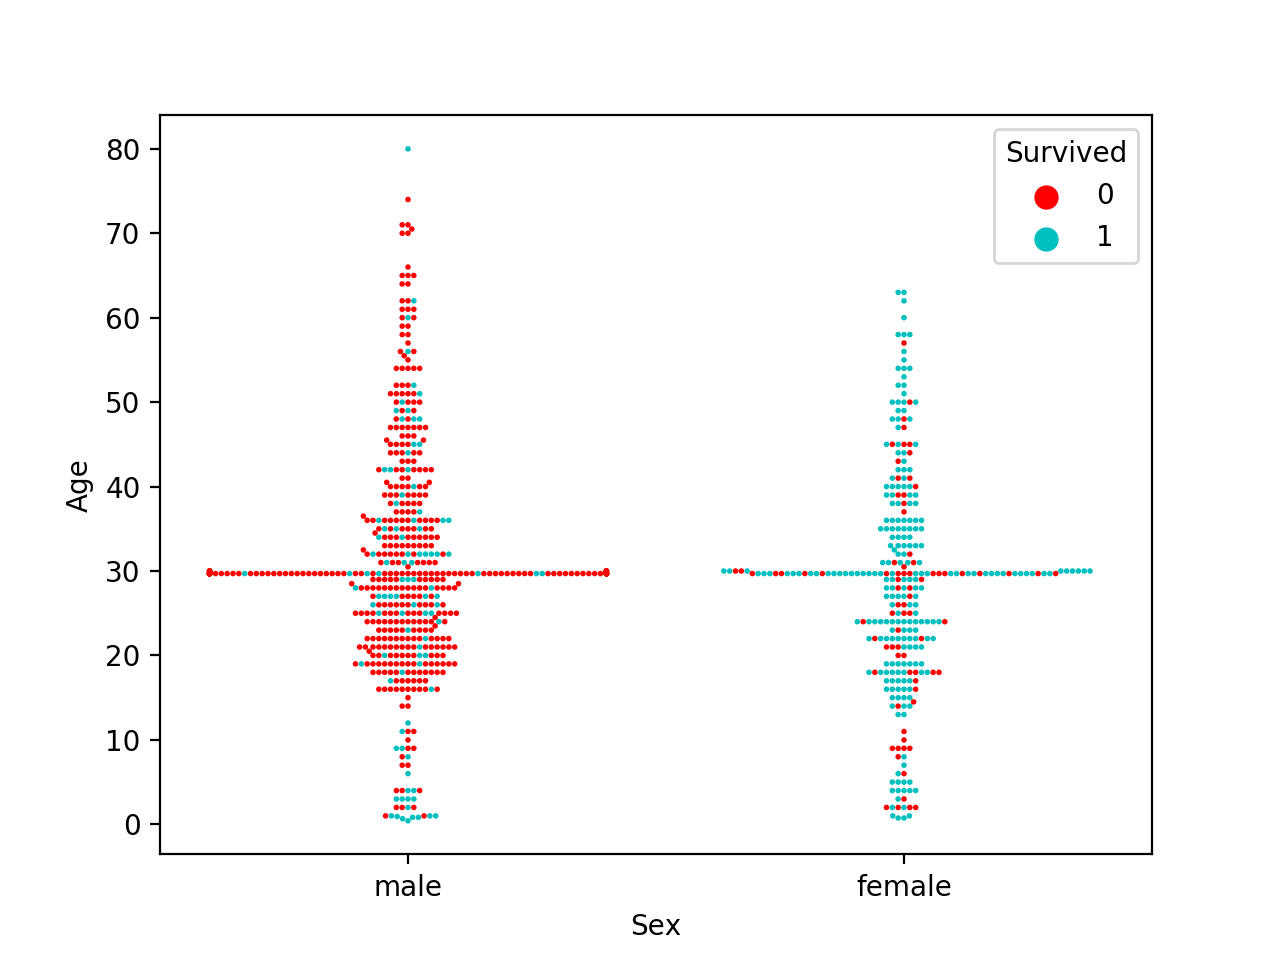

In [11]:
plt.figure()
sns.swarmplot(x="Sex", y="Age", hue="Survived",
              palette=["r", "c"], data=df_train, size=2)
plt.show()

<IPython.core.display.Javascript object>


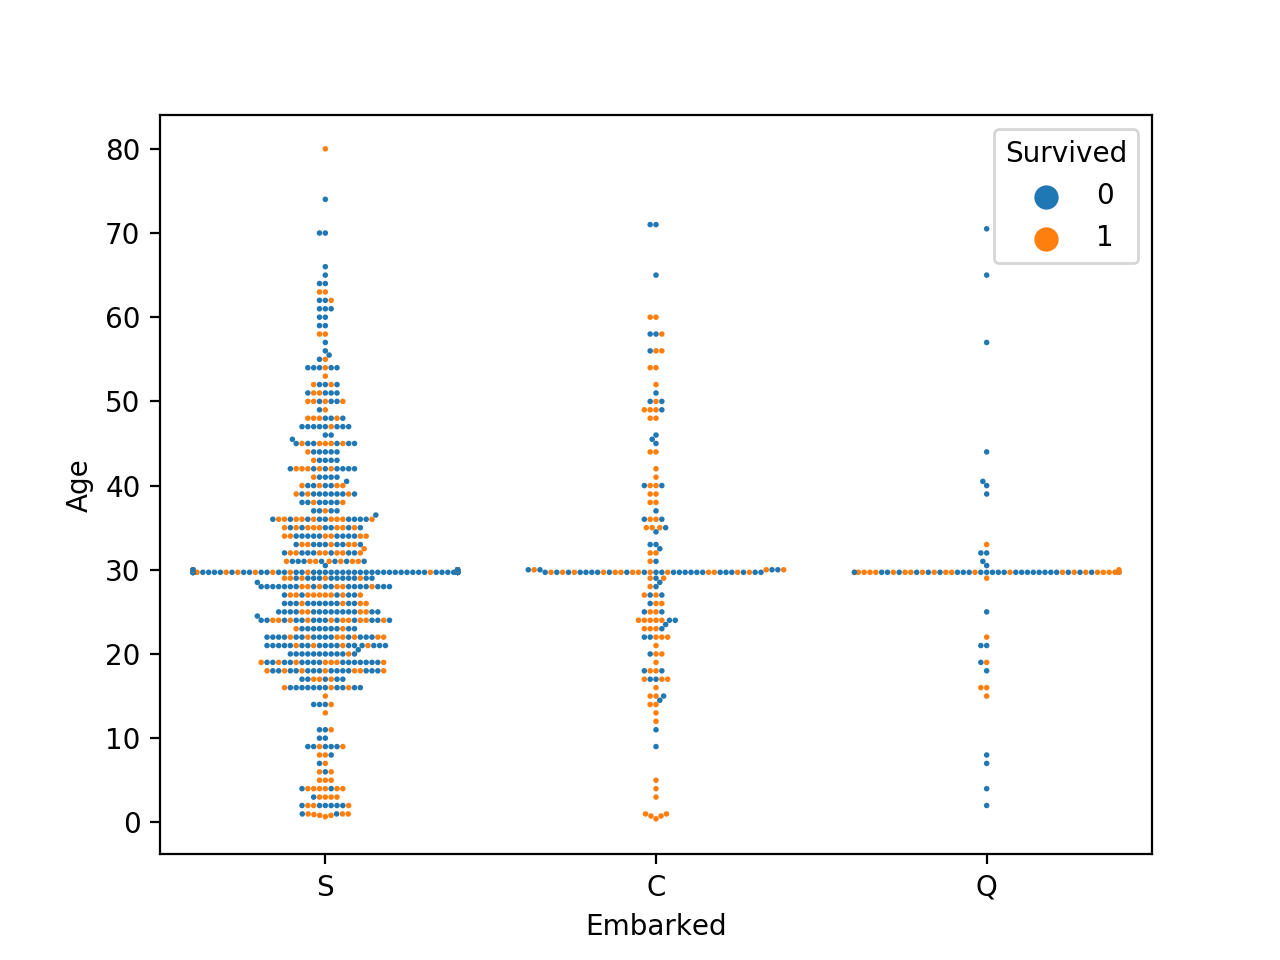

In [12]:
plt.figure()
sns.swarmplot(x="Embarked", y="Age", hue="Survived", data=df_train, size=2)
plt.show()

In [13]:
#
#  Fit decision tree to X_test
#